<div align="center">

  <a href="https://ultralytics.com/yolov8" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/banner-yolov8.png"></a>


<br>
  <a href="https://console.paperspace.com/github/ultralytics/ultralytics"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"/></a>
  <a href="https://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov8"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
<br>

Welcome to the Ultralytics YOLOv8 🚀 notebook! <a href="https://github.com/ultralytics/ultralytics">YOLOv8</a> is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by <a href="https://ultralytics.com">Ultralytics</a>. This notebook serves as the starting point for exploring the various resources available to help you get started with YOLOv8 and understand its features and capabilities.

The YOLOv8 models are designed to be fast, accurate, and easy to use, making them an excellent choice for a wide range of object detection and image segmentation tasks. They can be trained on large datasets and are capable of running on a variety of hardware platforms, from CPUs to GPUs.

Whether you are a seasoned machine learning practitioner or new to the field, we hope that the resources in this notebook will help you get the most out of YOLOv8. Please feel free to browse the <a href="https://docs.ultralytics.com/">YOLOv8 Docs</a> and reach out to us with any questions or feedback.

This notebook is modified from the source, which is created by Ultralytics. All credit goes to the original authors.

</div>

# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/requirements.txt) and check PyTorch and GPU.

In [ ]:
pip freeze > requirements.txt

In [ ]:
# Pip install method (recommended)
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.40 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/78.2 GB disk)


In [ ]:
# Git clone method (for development)
!git clone https://github.com/ultralytics/ultralytics
%pip install -qe ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 5171, done.
remote: Total 5171 (delta 0), reused 0 (delta 0), pack-reused 5171
Receiving objects: 100% (5171/5171), 4.07 MiB | 13.15 MiB/s, done.
Resolving deltas: 100% (3470/3470), done.
  Preparing metadata (setup.py) ... done


# 1. Predict

YOLOv8 may be used directly in the Command Line Interface (CLI) with a `yolo` command for a variety of tasks and modes and accepts additional arguments, i.e. `imgsz=640`. See a full list of available `yolo` [arguments](https://docs.ultralytics.com/cfg/) in the YOLOv8 [Docs](https://docs.ultralytics.com).


In [ ]:
# Run inference on an image with YOLOv8n
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

Ultralytics YOLOv8.0.40 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 165k/165k [00:00<00:00, 20.3MB/s]
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 15.4ms
Speed: 0.7ms pre-process, 15.4ms inference, 38.8ms postprocess per image at shape (1, 3, 640, 640)


# 2. Val
Validate a model's accuracy on the [COCO](https://cocodataset.org/#home) dataset's `val` or `test` splits. The latest YOLOv8 [models](https://github.com/ultralytics/ultralytics#models) are downloaded automatically the first time they are used.

In [ ]:
# Download COCO val
import torch
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d ../datasets && rm tmp.zip  # unzip

  0%|          | 0.00/780M [00:00<?, ?B/s]

replace ../datasets/coco/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Validate YOLOv8n on COCO128 val
!yolo val model=yolov8n.pt data=coco128.yaml

Ultralytics YOLOv8.0.40 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 33, in <module>
    sys.exit(load_entry_point('ultralytics', 'console_scripts', 'yolo')())
  File "/content/ultralytics/ultralytics/yolo/cfg/__init__.py", line 304, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.8/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "/content/ultralytics/ultralytics/yolo/engine/model.py", line 202, in val
    validator(model=self.model)
  File "/usr/local/lib/python3.8/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "/content/ultralytics/ultralytics/yolo/engine/validator.py", line 98, in __call__
    model = AutoBackend(model, device=self.device, dnn=self.args.dnn, data=self.args.data, fp16=self.args.half)
  File 

# 3. Train

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/yolov8/banner-integrations.png"/></a></p>

Train YOLOv8 on [Detection](https://docs.ultralytics.com/tasks/detection/), [Segmentation](https://docs.ultralytics.com/tasks/segmentation/) and [Classification](https://docs.ultralytics.com/tasks/classification/) datasets.

In [ ]:
# Train YOLOv8n on COCO128 for 3 epochs
!yolo train model=yolov8n.pt data=coco128.yaml epochs=3 imgsz=640

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 33, in <module>
    sys.exit(load_entry_point('ultralytics', 'console_scripts', 'yolo')())
  File "/usr/local/bin/yolo", line 25, in importlib_load_entry_point
    return next(matches).load()
  File "/usr/lib/python3.8/importlib/metadata.py", line 77, in load
    module = import_module(match.group('module'))
  File "/usr/lib/python3.8/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1014, in _gcd_import
  File "<frozen importlib._bootstrap>", line 991, in _find_and_load
  File "<frozen importlib._bootstrap>", line 961, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "<frozen importlib._bootstrap>", line 1014, in _gcd_import
  File "<frozen importlib._bootstrap>", line 991, in _find_and_load
  File "<frozen importlib._bootstrap>", line 961, in _

# 4. Export

Export a YOLOv8 model to any supported format with the `format` argument, i.e. `format=onnx`.

- 💡 ProTip: Export to [ONNX](https://onnx.ai/) or [OpenVINO](https://docs.openvino.ai/latest/index.html) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://developer.nvidia.com/tensorrt) for up to 5x GPU speedup.


| Format                                                                     | `format=`          | Model                     |
|----------------------------------------------------------------------------|--------------------|---------------------------|
| [PyTorch](https://pytorch.org/)                                            | -                  | `yolov8n.pt`              |
| [TorchScript](https://pytorch.org/docs/stable/jit.html)                    | `torchscript`      | `yolov8n.torchscript`     |
| [ONNX](https://onnx.ai/)                                                   | `onnx`             | `yolov8n.onnx`            |
| [OpenVINO](https://docs.openvino.ai/latest/index.html)                     | `openvino`         | `yolov8n_openvino_model/` |
| [TensorRT](https://developer.nvidia.com/tensorrt)                          | `engine`           | `yolov8n.engine`          |
| [CoreML](https://github.com/apple/coremltools)                             | `coreml`           | `yolov8n.mlmodel`         |
| [TensorFlow SavedModel](https://www.tensorflow.org/guide/saved_model)      | `saved_model`      | `yolov8n_saved_model/`    |
| [TensorFlow GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph) | `pb`               | `yolov8n.pb`              |
| [TensorFlow Lite](https://www.tensorflow.org/lite)                         | `tflite`           | `yolov8n.tflite`          |
| [TensorFlow Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)         | `edgetpu`          | `yolov8n_edgetpu.tflite`  |
| [TensorFlow.js](https://www.tensorflow.org/js)                             | `tfjs`             | `yolov8n_web_model/`      |
| [PaddlePaddle](https://github.com/PaddlePaddle)                            | `paddle`           | `yolov8n_paddle_model/`   |



In [ ]:
!yolo export model=yolov8n.pt format=torchscript

Ultralytics YOLOv8.0.40 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from yolov8n.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

TorchScript: starting export with torch 1.13.1+cu116...
TorchScript: export success ✅ 1.7s, saved as yolov8n.torchscript (12.4 MB)

Export complete (2.4s)
Results saved to /content
Predict:         yolo task=detect mode=predict model=yolov8n.torchscript imgsz=640 
Validate:        yolo task=detect mode=val model=yolov8n.torchscript imgsz=640 data=coco.yaml 
Visualize:       https://netron.app


# 5. Python Usage

YOLOv8 was reimagined using Python-first principles for the most seamless Python YOLO experience yet. YOLOv8 models can be loaded from a trained checkpoint or created from scratch. Then methods are used to train, val, predict, and export the model. See a detailed Python usage examples in the YOLOv8 [Docs](https://docs.ultralytics.com/python/).

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from scratch
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data='coco128.yaml', epochs=3)  # train the model
results = model.val()  # evaluate model performance on the validation set
results = model('https://ultralytics.com/images/bus.jpg')  # predict on an image
success = model.export(format='onnx')  # export the model to ONNX format


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

KeyboardInterrupt: ignored

# 6. Tasks

YOLOv8 can train, val, predict and export models for the 3 primary tasks in vision AI: detection, segmentation and classification.

<img width="1024" src="https://user-images.githubusercontent.com/26833433/212094133-6bb8c21c-3d47-41df-a512-81c5931054ae.png">


## 1. Detection

YOLOv8 _detection_ models have no suffix and are the default YOLOv8 models, i.e. `yolov8n.pt` and are pretrained on COCO. See [Detection Docs](https://docs.ultralytics.com/tasks/detection/) for full details.


In [ ]:
# Load YOLOv8n, train it on COCO128 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model
#model.train(data='coco128.yaml', epochs=3)  # train the model
pred = model('https://ultralytics.com/images/bus.jpg')  # predict on an image
print(pred)
type(pred[0].masks)
# top left, bottom right
print(pred[0].boxes.xyxy)
classes = pred[0].boxes.cls
idx_to_name = pred[0].names
names = [idx_to_name[int(cls)] for cls in classes]
print(names)

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

Ultralytics YOLOv8.0.40 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs



  0%|          | 0.00/476k [00:00<?, ?B/s]

image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 15.4ms
Speed: 0.6ms pre-process, 15.4ms inference, 44.8ms postprocess per image at shape (1, 3, 640, 640)


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
type: <class 'torch.Tensor'>
shape: torch.Size([6, 6])
dtype: torch.float32
 + tensor([[1.70000e+01, 2.31000e+02, 8.02000e+02, 7.68000e+02, 8.70545e-01, 5.00000e+00],
        [4.90000e+01, 3.99000e+02, 2.45000e+02, 9.03000e+02, 8.68980e-01, 0.00000e+00],
        [6.70000e+02, 3.80000e+02, 8.10000e+02, 8.76000e+02, 8.53604e-01, 0.00000e+00],
        [2.21000e+02, 4.06000e+02, 3.45000e+02, 8.57000e+02, 8.19305e-01, 0.00000e+00],
        [0.00000e+00, 2.55000e+02, 3.20000e+01, 3.25000e+02, 3.46069e-01, 1.10000e+01],
        [0.00000e+00, 5.51000e+02, 6.70000e+01, 8.74000e+02, 3.01294e-01, 0.00000e+00]], device='cuda:0')]
tensor([[ 17., 231., 802., 768.],
        [ 49., 399., 245., 903.],
        [670., 380., 810., 876.],
        [221., 406., 345., 857.],
        [  0., 255.,  32., 325.],
        [  0., 551.,  67., 874.]], device='cuda:0')
['bus', 'person', 'person', 'person', 'stop sign', 'person']


image 1/1: 1080x810 4 persons, 1 bus
Speed: 485.5ms pre-process, 10.4ms inference, 1.4ms NMS per image at shape (1, 3, 640, 480)


tensor([[ 17., 231., 801., 769.],
        [ 49., 399., 244., 903.],
        [670., 380., 810., 875.],
        [221., 406., 345., 857.],
        [  0., 255.,  32., 325.],
        [  0., 551.,  67., 874.]], device='cuda:0')
['bus', 'person', 'person', 'person', 'stop sign', 'person']


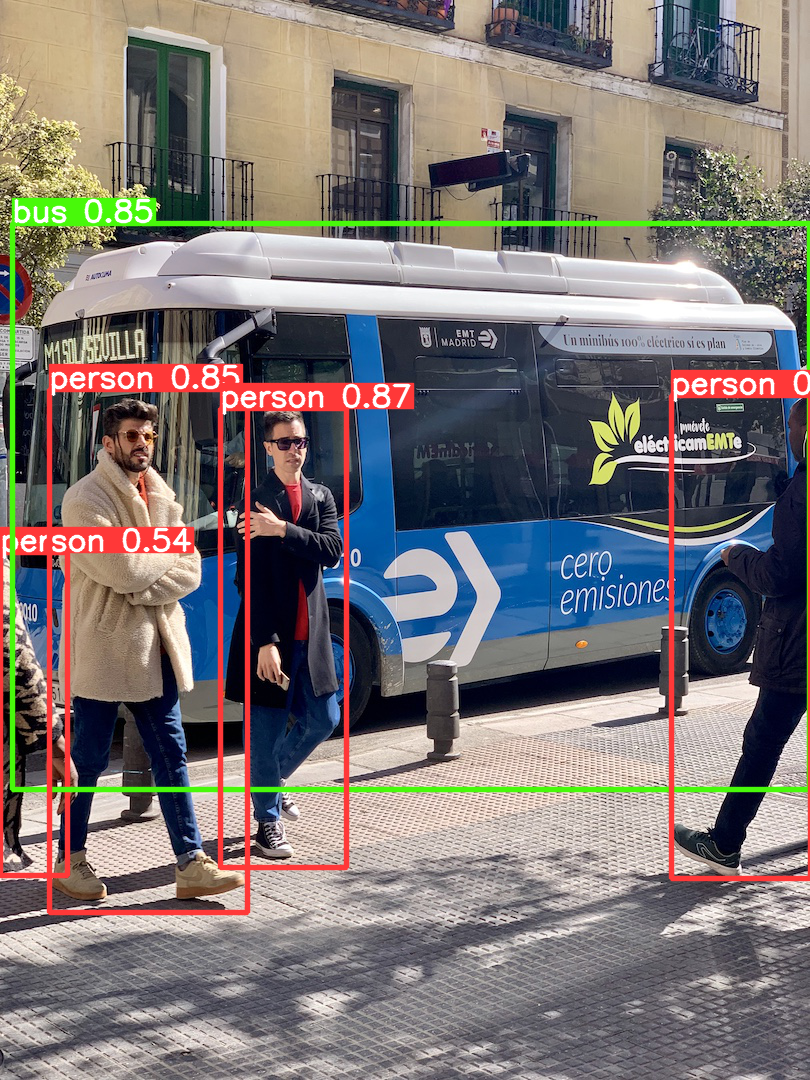

In [ ]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
results = model('https://ultralytics.com/images/bus.jpg', size=640) # batch of images

# Results
results.print()  
results.show()

## 2. Segmentation

YOLOv8 _segmentation_ models use the `-seg` suffix, i.e. `yolov8n-seg.pt` and are pretrained on COCO. See [Segmentation Docs](https://docs.ultralytics.com/tasks/segmentation/) for full details.


In [ ]:
# Load YOLOv8n-seg, train it on COCO128-seg for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')  # load a pretrained YOLOv8n segmentation model
model.train(data='coco128-seg.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

ModuleNotFoundError: ignored

## 3. Classification

YOLOv8 _classification_ models use the `-cls` suffix, i.e. `yolov8n-cls.pt` and are pretrained on ImageNet. See [Classification Docs](https://docs.ultralytics.com/tasks/classification/) for full details.


In [ ]:
# Load YOLOv8n-cls, train it on mnist160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model
model.train(data='mnist160', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

# Appendix

Additional content below.

In [ ]:
# Run YOLOv8 tests (git clone install only)
!pytest ultralytics/tests

In [ ]:
# Validate multiple models
for x in 'nsmlx':
  !yolo val model=yolov8{x}.pt data=coco.yaml